*** This is the demonstration of Dataframes in Pandas.***



###  DataFrames :

<li>DataFrame is basically a heterogenous tabular data structure that is used to represent the tabular data.
<li>The columns of a dataframe are mutable.
<li>The columns of a dataframe can be of different Datatypes.
<li>The DataFrame is a dictionary-like structure with labelled axes, ie. Rows and columns.
<li>The Dataframes are capable of performing Arithmetic operations on rows and columns.

***The following example demonstrates the use of Dataframes in Pandas.***

In [30]:
%matplotlib inline

import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

if int(os.environ.get("MODERN_PANDAS_EPUB", 0)):
    import prep # noqa

pd.options.display.max_rows = 10
sns.set(style='ticks', context='talk')


***IPython has a set of predefined Magic Functions that can be called in a command line style pattern.
There are two kinds of magics viz. Line-Oriented and Cell-Oriented. 
The Line magics are similar to the command line calls of the OS. Here, they get the rest of the line as the argument and the argumnts are passed without the parenthesis or quotes.  
The Line magics are prefixed with the "%" sign.
The Line magics can return results and can be assigned on the RHS of an assignment. ***

<li>%matplotlib inline is a magic function in IPython. Here, inline is a backend provided by IPython which is available only for Jupyter notebook and Jupyter QtConsole.
<li>With this backend, the output of the plotting commands is produced and displayed inline directly below the code cell, which can then be saved in a document.

<li>Initially, all the required packages like numpy, pandas, seaborn and matplotlib are imported for carrying out the operations on dataframes.
<li>"os.environ" is a mapping object of the OS library, representing the string environment. Here, os.environ.get("MODERN_PANDAS_EPUB") gets "MODERN_PANDAS_EPUB", which is a pathname on the directory.
 






In [40]:
fp = 'data-nba.csv'

if not os.path.exists('fp'):
    tables = pd.read_html("http://www.basketball-reference.com/leagues/NBA_2016_games.html")
    games = tables[0]
    games.to_csv(fp)
else:
    games = pd.read_csv(fp)
games.head()

,Date,Start (ET),Visitor/Neutral,PTS,Home/Neutral,PTS.1,,.1,Notes
0,"Tue, Oct 27, 2015",8:00 pm,Detroit Pistons,106,Atlanta Hawks,94,Box Score,NaN,NaN
1,"Tue, Oct 27, 2015",8:00 pm,Cleveland Cavaliers,95,Chicago Bulls,97,Box Score,NaN,NaN
2,"Tue, Oct 27, 2015",10:30 pm,New Orleans Pelicans,95,Golden State Warriors,111,Box Score,NaN,NaN
3,"Wed, Oct 28, 2015",7:30 pm,Philadelphia 76ers,95,Boston Celtics,112,Box Score,NaN,NaN
4,"Wed, Oct 28, 2015",7:30 pm,Chicago Bulls,115,Brooklyn Nets,100,Box Score,NaN,NaN


<li>Here, the string 'data-nba.csv' is assigned to a variable fp.
<li>If the file 'data-nba.csv' doesnt exist on the directory, the pd.read_html will read the data from the given website and assign it to the dataframe "table". tables[0] is the list of DataFrames.
<li>This list is then assigned to games. and converted to CSV format.
<li>If the file is already present on the directory, then the CSV file is directly read from the directory.

In [41]:
column_names = {'Date': 'date', 'Start (ET)': 'start',
                'Unamed: 2': 'box', 'Visitor/Neutral': 'away_team', 
                'PTS': 'away_points', 'Home/Neutral': 'home_team',
                'PTS.1': 'home_points', 'Unamed: 7': 'n_ot'}

games = (games.rename(columns=column_names)
    .dropna(thresh=4)
    [['date', 'away_team', 'away_points', 'home_team', 'home_points']]
    .assign(date=lambda x: pd.to_datetime(x['date'], format='%a, %b %d, %Y'))
    .set_index('date', append=True)
    .rename_axis(["game_id", "date"])
    .sort_index())
games.head()

,,away_team,away_points,home_team,home_points
game_id,date,,,,
0,2015-10-27,Detroit Pistons,106,Atlanta Hawks,94
1,2015-10-27,Cleveland Cavaliers,95,Chicago Bulls,97
2,2015-10-27,New Orleans Pelicans,95,Golden State Warriors,111
3,2015-10-28,Philadelphia 76ers,95,Boston Celtics,112
4,2015-10-28,Chicago Bulls,115,Brooklyn Nets,100


<li>In this block of code, "column_names" is a dictionary consisting of key and value pairs.
<li>games.rename() renames the column names with the new values from the dictionary. ie. the column "Date" is renamed as "date" ,"Visitor/Neutral" is ranamed as "away_team" and so on.
<li> .dropna(thresh=4) keeps only the rows that contain atleast 4 not-na values.
<li> The assign() function is used to assign new columns to a dataframe. It retirns a copy of the new object with all the original columns in addition to the new ones.
<li>In this example, the assign() function is used to set the date format to YYYY-MM-DD and assign it to the column "date".
<li>set_index() is used to set the dataframe index using one or more existing columns. Here, the index is set using the column "date". Here, "date" is the key parameter of the set_index() function.
<li>rename_axis function alters index columns using input functions. Here, it is used to alter the index name to "game_id".
<li>sort_index is used to sort objects by labels along an axis.

In [4]:
tidy = pd.melt(games.reset_index(),
               id_vars=['game_id', 'date'], value_vars=['away_team', 'home_team'],
               value_name='team')
tidy.head()

,game_id,date,variable,team
0,0,2015-10-27,away_team,Detroit Pistons
1,1,2015-10-27,away_team,Cleveland Cavaliers
2,2,2015-10-27,away_team,New Orleans Pelicans
3,3,2015-10-28,away_team,Philadelphia 76ers
4,4,2015-10-28,away_team,Chicago Bulls


<li>Similar to the pivot tables, melt() is used to transform data. Here, the melt() function takes three parameters. First is the dataframe, where the index is reset to "game_id". Second is the id_vars. ID variables are basically the things to be represented on the x-axis. ie. the columns that are to be kept intact and doesn't need to be transformed.   
<li>value_vars are the columns that we need to unpivot. If nothing is specified within the value_vars, by default it takes all the columns. Here, the columns to unpivot are the "away_team" and "home_team".
<li>value_name is used to set the name of the column. Here, the name of the column is set to "team".
<li>tiny.head() returns first few rows of the dataframe "tidy".

In [72]:
# For each team... get number of days between games
tidy.groupby('team')['date'].diff().dt.days - 1

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
     ... 
71    1.0
72    2.0
73    2.0
74    2.0
75    0.0
Name: date, Length: 76, dtype: float64

<li>The groupby() function of the dataframe is used to group the series using mapper or by a series of columns.
<li>The mapper can be a dictionary or a key function and it returns the result as a series.
<li>This block of code will return a discrete difference of object "date" in number of days.

In [6]:
tidy['rest'] = tidy.sort_values('date').groupby('team').date.diff().dt.days - 1
tidy.dropna().head()

,game_id,date,variable,team,rest
4,4,2015-10-28,away_team,Chicago Bulls,0.0
8,8,2015-10-28,away_team,Cleveland Cavaliers,0.0
14,14,2015-10-28,away_team,New Orleans Pelicans,0.0
17,17,2015-10-29,away_team,Memphis Grizzlies,0.0
18,18,2015-10-29,away_team,Dallas Mavericks,0.0


<li>The sort_values() function is used to sort the data by the values along either axes.
<li>This block of code adds a column "rest" to the dataframe, returns the first few rows that are sorted on the basis of the column "date" and are grouped by the column "team". Basically, this code calculates the days of rest between two matches.

In [7]:
by_game = (pd.pivot_table(tidy, values='rest',
                          index=['game_id', 'date'],
                          columns='variable')
             .rename(columns={'away_team': 'away_rest',
                              'home_team': 'home_rest'}))
df = pd.concat([games, by_game], axis=1)
df.dropna().head()

,,away_team,away_points,home_team,home_points,away_rest,home_rest
game_id,date,,,,,,
17,2015-10-29,Memphis Grizzlies,112,Indiana Pacers,103,0.0,0.0
18,2015-10-29,Dallas Mavericks,88,Los Angeles Clippers,104,0.0,0.0
19,2015-10-29,Atlanta Hawks,112,New York Knicks,101,1.0,0.0
20,2015-10-30,Charlotte Hornets,94,Atlanta Hawks,97,1.0,0.0
21,2015-10-30,Toronto Raptors,113,Boston Celtics,103,1.0,1.0


<li>Here, pd.pivot_table creates a spreadsheet-style pivot table similar to the dataframe "tidy".
<li>The pivot_table() takes four parameters ie. the Dataframe-"tidy"; values- the columns to aggregate; index- The columns on the basis of which the data is to be ordered. and columns- they are optional. They provide an additional way to segment the actual values you care about. 
<li>The columns "away_team" is renamed to "awauy_rest" and "home_team" is remaned to "home_rest".
<li>The Dataframe df is the concatenation of the pivot table "by_game" and "games" 
<li>axis=1 in the concat() function is the axis to concatenate along.
<li>This block of code creates a pivot table "by_game" by carrying out all the above operations on the dataframe "tidy". 

c:\users\viki4\appdata\local\programs\python\python36\lib\site-packages\seaborn\axisgrid.py:703: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


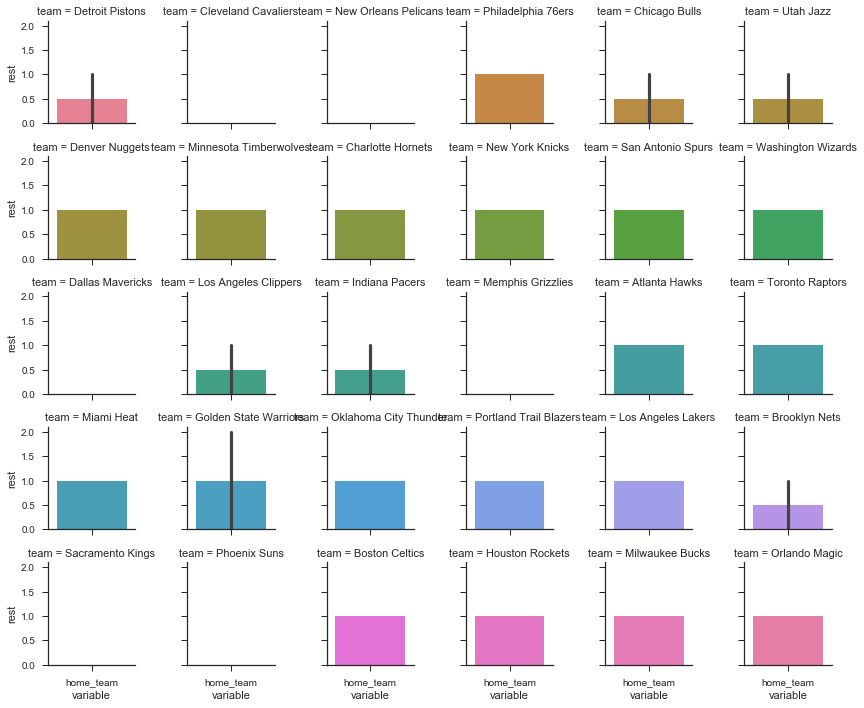

In [84]:
sns.set(style='ticks', context='notebook')
g = sns.FacetGrid(tidy, col='team', col_wrap=6, hue='team', size=2)
g.map(sns.barplot, 'variable', 'rest');

***The above graph is plotted using the seaborn library of Python.***
***Seaborn is a Python library which is used for data visualization and is based on matplotlib.***
*** It provides a high-level interface for drawing attractive statistical graphics.***

<li>Seaborn has a set of predefined functions.
<li>The set() function in seaborn is used to set the aesthetic parameters of the graphs easily.
<li>Here, the set() function takes two parameters: Style-This affects things like the color of the axes, whether a grid is enabled by default, and other aesthetic elements. and Context is set to notebook.
<li>FacetGrid basically is a subplot grid for plotting conditional relationships.
<li>The FacetGrid is an object that links a Pandas DataFrame to a matplotlib figure with a particular structure.
<li>Here, the facetgrid takes the following parameters- the dataframe "tidy"; col,hue -Variables that define subsets of the data, which will be drawn on separate facets in the grid and the size is used to specify the height of each facet.
<li>The above block of code produces a barplot that represents the rest between the games among the teams, with the "teams" on the x-axis and "rest" on the y-axis.



In [13]:
df['home_win'] = df['home_points'] > df['away_points']
df['rest_spread'] = df['home_rest'] - df['away_rest']
df.dropna().head()

,,away_team,away_points,home_team,home_points,away_rest,home_rest,home_win,rest_spread
game_id,date,,,,,,,,
17,2015-10-29,Memphis Grizzlies,112,Indiana Pacers,103,0.0,0.0,False,0.0
18,2015-10-29,Dallas Mavericks,88,Los Angeles Clippers,104,0.0,0.0,True,0.0
19,2015-10-29,Atlanta Hawks,112,New York Knicks,101,1.0,0.0,False,-1.0
20,2015-10-30,Charlotte Hornets,94,Atlanta Hawks,97,1.0,0.0,True,-1.0
21,2015-10-30,Toronto Raptors,113,Boston Celtics,103,1.0,1.0,False,0.0


<li>In this block of code, the column "home_win" is added to the dataframe which is a boolean value obtained by comparing the greater value among the columns "home_points" and "away_points".
<li>Also, a new column "rest_spread" is added to the dataframe which is the difference of the columns "home_rest" and "away_rest".
<li>The block returns the first few columns of the dataframe with any missing values.

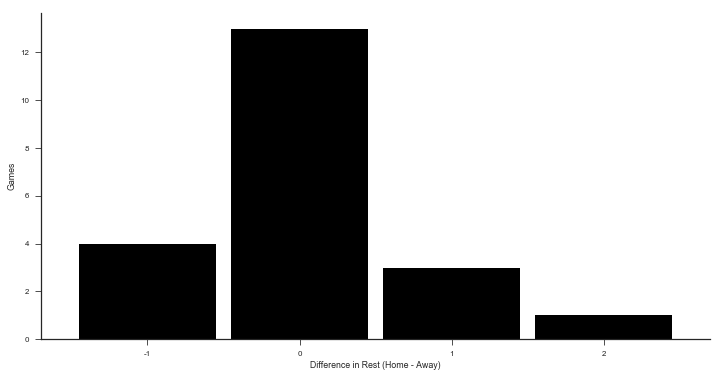

In [81]:
delta = (by_game.home_rest - by_game.away_rest).dropna().astype(int)
ax = (delta.value_counts()
    .reindex(np.arange(delta.min(), delta.max() + 1), fill_value=0)
    .sort_index()
    .plot(kind='bar', color='k', width=.9, rot=0, figsize=(12, 6))
)
sns.despine()
ax.set(xlabel='Difference in Rest (Home - Away)', ylabel='Games');

<li>In this block of code, the difference in the columns "home_rest" and "home_rest" of gthe pivot table by_game is calculated. The difference yields a float result and it is type-casted into integer datatype in order to maintain the consistency during plotting.
<li>The function delta.value_counts() returns an object containing counts of unique values in delta. The resulting object will be in descending order so that the first element is the most frequently-occurring element. It excludes NA values by default.
<li>The reindex() function is used to change the row and column labels of the dataframe. Here the dataframe is reindexed to the range of minimum and maximum value limits of delta and the missing values in the dataframe is replaced by 0 using fill_value attribute.
<li>Now the dataframe is sorted by index and the bar graph is plotted.
<li>plot() function has the parameters to specify the aesthetic properties of the graph.
<li>sns.despine() removes the top and right spines from the plot.
<li>The labels of the x-axis and the y-axis are set.
<li>The above block of code displays a graph that represents the difference in days between two games.

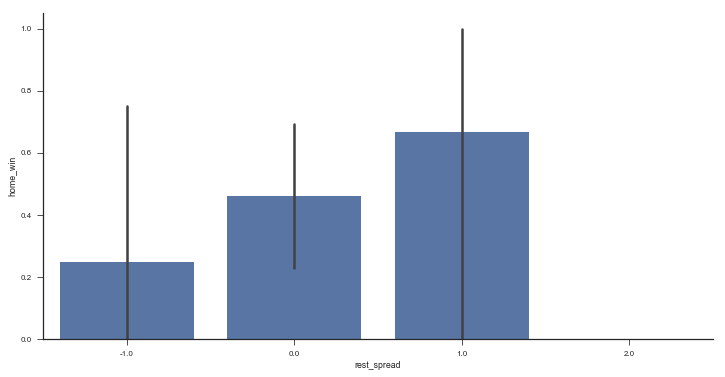

In [15]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(x='rest_spread', y='home_win', data=df.query('-3 <= rest_spread <= 3'),
            color='#4c72b0', ax=ax)
sns.despine()

<li>creates a figure with size 1200 by 600 pixels
<li>The X-axis represents 'rest_spread' and Y-axis represents 'home_win'.If rest_spread is between -3 and 3 then the graph is as shown above.
<li>The sns.despine() function removes the top and right spines from plot.


In [16]:
rest = (tidy.groupby(['date', 'variable'])
            .rest.mean()
            .dropna())
rest.head()

date        variable 
2015-10-28  away_team    0.000000
            home_team    0.000000
2015-10-29  away_team    0.333333
            home_team    0.000000
2015-10-30  away_team    1.083333
Name: rest, dtype: float64

<li> This block of code groups the 'date' and 'variable' columns and then calculates the mean of rest column and then drops rows with NA values
<li>'rest.head()' displays top 5 rows 

In [17]:
rest.unstack().head()

variable,away_team,home_team
date,,
2015-10-28,0.000000,0.000000
2015-10-29,0.333333,0.000000
2015-10-30,1.083333,0.916667
2015-10-31,0.166667,0.833333


<li>This block of code arranges the above output in more readable manner.
<li>The author has used unstack(level=1) for arranging the output for columns 'away_team' and 'home_team'

In [18]:
rest.unstack().stack()

date        variable 
2015-10-28  away_team    0.000000
            home_team    0.000000
2015-10-29  away_team    0.333333
            home_team    0.000000
2015-10-30  away_team    1.083333
            home_team    0.916667
2015-10-31  away_team    0.166667
            home_team    0.833333
dtype: float64

<li>The above block of code returns the values grouped by date in stacked form and their corresponding variables are shown.

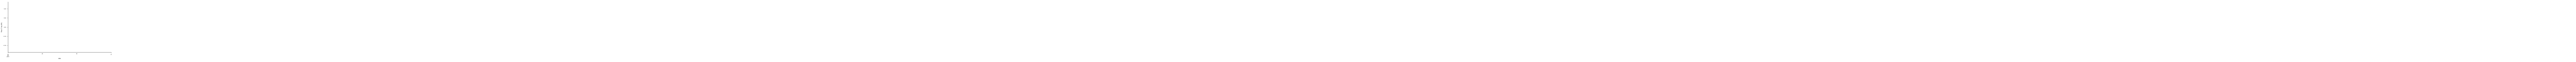

In [19]:
with sns.color_palette() as pal:
    b, g = pal.as_hex()[:2]

ax=(rest.unstack()
        .query('away_team < 7')
        .rolling(7)
        .mean()
        .plot(figsize=(12, 6), linewidth=3, legend=False))
ax.set(ylabel='Rest (7 day MA)')
ax.annotate("Home", (rest.index[-1][0], 1.02), color=g, size=14)
ax.annotate("Away", (rest.index[-1][0], 0.82), color=b, size=14)
sns.despine()

<li>The color_palette() function accepts the name of any seaborn palette or matplotlib colormap. It can also take a list of colors specified in any valid matplotlib format (RGB tuples, hex color codes, or HTML color names). 
The return value is always a list of RGB tuples.

<li>Also, calling color_palette() with no arguments will return the current default color cycle.

<li>When we use text(),it will just randomly insert values anywhere in the graph.
To avoid this,author has made use of 'annotate()' method to make annotations easier.In an annotation, there are two points to consider: the location being annotated represented by the argument xy and the location of the text xytext. Both of these arguments are (x,y) tuples.

<li>The annotate() function in the pyplot module is used to draw an arrow connecting two points on the plot.

## References :
<li>https://www.tutorialspoint.com/python_pandas/index.htm
<li>https://seaborn.pydata.org/index.html
<li>https://matplotlib.org/index.html